In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)


,Unnamed: 0,cgpa,iq,placement
280,280,5.4,180,0
27,27,6.0,124,1
176,176,4.9,185,0
292,292,4.9,175,0
110,110,6.3,140,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   cgpa        300 non-null    float64
 2   iq          300 non-null    int64  
 3   placement   300 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.5 KB


In [5]:
df.shape

(300, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [8]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'student CGPA and IQ')

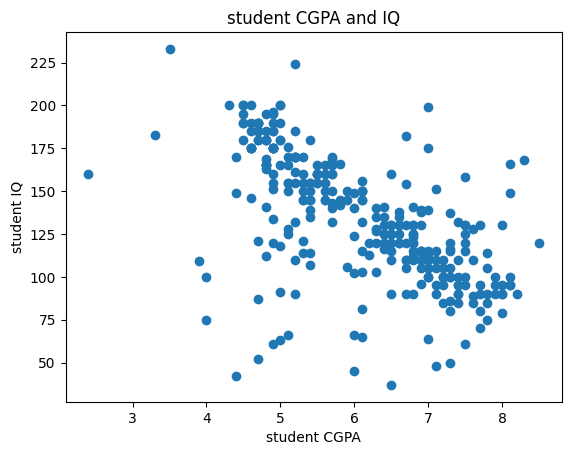

In [9]:
plt.scatter(df['cgpa'],df['iq'])
plt.xlabel("student CGPA")
plt.ylabel("student IQ")
plt.title("student CGPA and IQ")

<Axes: xlabel='cgpa'>

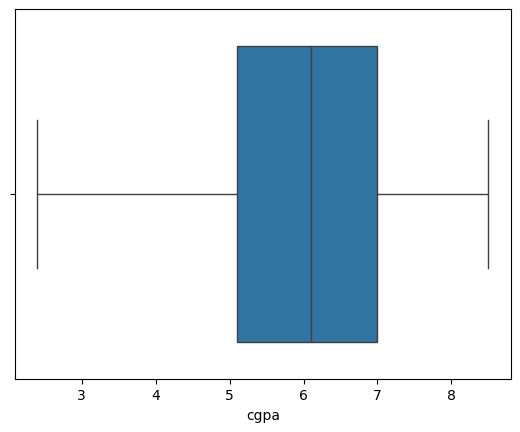

In [10]:
import seaborn as sns

# sns.boxplot(x = df['iq'],data=df,)
sns.boxplot(x = df['cgpa'],data=df)


In [11]:
df['placement'].value_counts()

placement
1    151
0    149
Name: count, dtype: int64

In [12]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
x

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
295,7.2,110
296,5.5,160
297,6.8,130
298,4.7,185


In [14]:
y

0      1
1      0
2      0
3      1
4      0
      ..
295    1
296    0
297    1
298    0
299    1
Name: placement, Length: 300, dtype: int64

In [15]:
y.shape

(300,)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [18]:
x_train

,cgpa,iq
63,6.3,128
234,5.0,200
229,8.0,90
111,7.8,75
231,7.5,130
...,...,...
188,4.7,190
71,6.1,132
106,6.5,110
270,5.3,145


In [19]:
y_train

63     1
234    0
229    1
111    1
231    1
      ..
188    0
71     1
106    1
270    0
102    1
Name: placement, Length: 255, dtype: int64

In [20]:
y_test.shape

(45,)

In [21]:
x_test

,cgpa,iq
203,6.9,110
266,5.5,155
152,4.9,185
9,5.1,66
233,6.7,120
226,4.5,190
196,4.6,200
109,5.1,125
5,7.1,48
175,6.9,115


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scalre = StandardScaler()

In [24]:
x_train = scalre.fit_transform(x_train)

In [25]:
x_train

array([[ 0.18606666, -0.2015774 ],
       [-0.96255716,  1.80981447],
       [ 1.68811321, -1.26314533],
       [ 1.51140185, -1.68218531],
       [ 1.24633481, -0.1457054 ],
       [-1.13926852,  1.67013448],
       [-1.2276242 ,  1.53045449],
       [ 1.15797913, -1.12346534],
       [-1.13926852,  0.94379853],
       [ 0.62784506, -0.1457054 ],
       [-0.87420148,  0.41301456],
       [ 0.53948938,  1.30696651],
       [-0.7858458 , -0.70442537],
       [-1.05091284,  1.11141452],
       [-0.96255716, -1.23520933],
       [-1.05091284,  1.11141452],
       [-1.13926852, -0.64855337],
       [-0.34406741,  0.21746257],
       [ 1.33469049, -0.70442537],
       [ 1.51140185, -1.40282532],
       [ 1.33469049, -0.2015774 ],
       [-1.05091284, -0.42506538],
       [-1.40433556,  1.67013448],
       [ 0.00935531, -1.96154529],
       [-0.87420148,  0.83205454],
       [ 1.24633481, -1.12346534],
       [-0.7858458 ,  1.3907745 ],
       [ 0.00935531,  0.27333457],
       [ 1.59975753,

In [26]:
x_test = scalre.transform(x_test)

In [27]:
x_test

array([[ 0.71620074, -0.70442537],
       [-0.52077877,  0.55269455],
       [-1.05091284,  1.3907745 ],
       [-0.87420148, -1.93360929],
       [ 0.53948938, -0.42506538],
       [-1.40433556,  1.53045449],
       [-1.31597988,  1.80981447],
       [-0.87420148, -0.28538539],
       [ 0.8929121 , -2.43645726],
       [ 0.71620074, -0.56474538],
       [ 0.62784506, -0.56474538],
       [ 0.36277802, -0.1457054 ],
       [-0.87420148,  0.97173453],
       [-0.07900037, -1.93360929],
       [-0.34406741,  0.41301456],
       [ 0.71620074, -0.56474538],
       [ 1.68811321, -1.26314533],
       [ 0.36277802, -0.1457054 ],
       [-1.31597988,  1.11141452],
       [ 1.24633481, -0.98378535],
       [ 0.00935531, -1.51456932],
       [ 0.00935531, -0.56474538],
       [ 1.42304617, -1.26314533],
       [-0.60913445,  0.27333457],
       [ 1.68811321, -0.1457054 ],
       [ 1.33469049, -1.29108133],
       [ 0.71620074, -0.70442537],
       [ 0.98126778, -0.70442537],
       [ 0.80455642,

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
clf.fit(x_train,y_train)

LogisticRegression()

In [31]:
x_pred = clf.predict(x_test)

In [32]:
y_test

203    1
266    0
152    0
9      0
233    1
226    0
196    0
109    0
5      1
175    1
237    1
57     1
218    0
45     1
182    0
221    1
289    1
211    1
148    0
165    1
78     0
113    0
249    1
250    0
104    1
42     1
281    1
295    1
157    1
238    0
17     0
164    0
33     0
24     0
215    1
119    1
7      0
90     1
46     0
73     0
93     1
76     0
286    0
60     1
77     1
Name: placement, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,x_pred)

0.9555555555555556

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

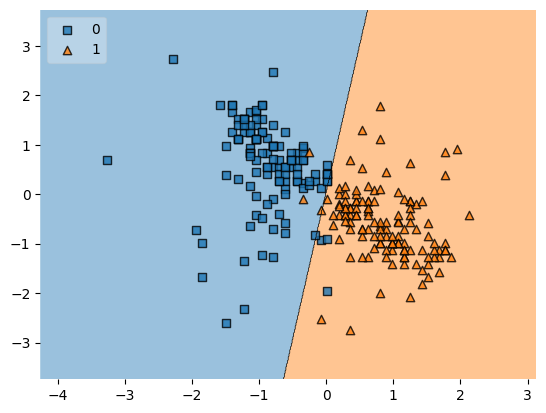

In [36]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [37]:
import pickle
import joblib

In [38]:
pickle.dump(clf,open('reg_model.pkl','wb'))
joblib.dump(scalre, 'reg.pkl')


['reg.pkl']